## 1. Fragestellungen und Datenbeschaffung

### 1.1 Titel:

- Zusammenhang zwischen Müttersterblichkeitsrate und Armut von 1990 bis 2020

### 1.2 Fragestellungen:

- Besteht eine Korrelation zwischen der Müttersterblichkeitsrate und der Armutsrate in verschiedenen Ländern zwischen 1990 und 2020?
- Welche Länder zeigen den stärksten positiven oder negativen Zusammenhang zwischen diesen beiden Variablen?
- Welche möglichen Ursachen gibt es für die erkannten Zusammenhänge?

### 1.3 Datenquellen:

- [Datensatz 1](https://ourworldindata.org/explorers/poverty-explorer?tab=chart&time=1990..2020&country=BGD~BOL~KEN~MOZ~NGA~ZMB~CHE~DZA~ARM~AZE~BTN~BIH~BRA~BGR~BDI~COG~DOM~EGY~EST~ETH~FRA~GHA~GIN~IND~IRN~IRQ~JOR~KAZ~LBN~LBR~MDG~MUS~MEX~MAR~MMR~NAM~NPL~MKD~NOR~ROU~PAK~PSE~PAN~PER~PHL~PRT~WSM~SEN~SYC~SLE~SVN~KOR~ESP~LKA~SDN~SUR~SWE~SYR~TZA~THA~TGO~TON~TUN~TUR~TKM~UGA~UKR~GBR~USA~URY~UZB~VUT~VEN~VNM~YEM~ZWE~GUY~JAM~ALB~COL&Indicator=Number+in+poverty&Poverty+line=%242.15+per+day%3A+International+Poverty+Line&Household+survey+data+type=Show+data+from+both+income+and+consumption+surveys&Show+breaks+between+less+comparable+surveys=false)
- [Datensatz 2](https://ourworldindata.org/grapher/maternal-mortality?tab=chart&time=1990..latest&country=ALB~DZA~ARM~AZE~BGD~BTN~BOL~BIH~BRA~BGR~BDI~COG~DOM~EGY~EST~ETH~FRA~GHA~GIN~GUY~IND~IRN~IRQ~JAM~JOR~KAZ~KEN~LBN~LBR~MDG~MUS~MEX~MAR~MMR~MOZ~NAM~NPL~NGA~MKD~NOR~PAK~PSE~PAN~PER~PHL~PRT~ROU~WSM~SEN~SYC~SLE~SVN~KOR~ESP~LKA~SDN~SUR~SWE~CHE~SYR~TZA~THA~TGO~TON~TUN~TKM~TUR~UGA~UKR~GBR~USA~URY~UZB~VUT~VNM~VEN~YEM~ZMB~ZWE~COL)

### 1.4 Daten beschaffen und laden:

In [194]:
import pandas as pd
from matplotlib import pyplot as plt

In [195]:
# Laden der Daten für Anzahl der in extremer Armut lebenden Menschen, 1990 bis 2020
df = pd.read_csv('number-of-people-living-in-extreme-poverty.csv', skiprows=1,
                 names=['Gebiet','Jahr','Die Zahl unter 2,15 Dollar pro Tag']) 
df.head() 

,Gebiet,Jahr,"Die Zahl unter 2,15 Dollar pro Tag"
0,Albania,1996,16944
1,Albania,2002,33337
2,Albania,2005,17800
3,Albania,2008,5892
4,Albania,2012,18003


In [196]:
# Laden der Daten für Müttersterblichkeitsrate, 1990 bis 2020
df1 = pd.read_csv('maternal-mortality.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Müttersterblichkeitsrate']) 
df1.head()  

,Gebiet,Code,Jahr,Müttersterblichkeitsrate
0,Albania,ALB,1990,32.874947
1,Albania,ALB,1991,29.074210
2,Albania,ALB,1992,27.674513
3,Albania,ALB,1993,26.515451
4,Albania,ALB,1994,24.240550


In [197]:
df['Jahr'] = df['Jahr'].astype(int) 
df1['Jahr'] = df1['Jahr'].astype(int)  

# Das Zusammenführen der beiden DataFrames
merged_df = pd.merge(df, df1, on=['Gebiet', 'Jahr'], how='inner')

# Zeilen mit NaN-Werten in relevanten Spalten entfernen
merged_df = merged_df.dropna(subset=['Die Zahl unter 2,15 Dollar pro Tag', 'Müttersterblichkeitsrate', 'Gebiet'])

# Die ersten paar Zeilen des zusammengeführten DataFrames anzeigen
merged_df.head()

,Gebiet,Jahr,"Die Zahl unter 2,15 Dollar pro Tag",Code,Müttersterblichkeitsrate
0,Albania,1996,16944,ALB,18.685230
1,Albania,2002,33337,ALB,12.407263
2,Albania,2005,17800,ALB,10.830499
3,Albania,2008,5892,ALB,9.739404
4,Albania,2012,18003,ALB,7.796703


## 2. Daten vorbereiten
- Die Rohdaten liegen im Long-Format vor und wurden für die Analyse mithilfe einer Pivot-Tabelle ins Wide-Format umgewandelt.
- Jede Zeile stellt ein Land oder eine Region dar (Index: 'Gebiet') und die Spalten repräsentieren die Jahre (Columns: 'Jahr') sowie die Werte (z. B. Müttersterblichkeitsrate, Armutsquote).
- Das Wide-Format ermöglicht die Analyse von Trends über Jahre hinweg und den Vergleich zwischen Ländern.
- Die Datensätze enthalten numerische Werte und NaN-Werte (fehlende Daten), die erkannt und bei Berechnungen berücksichtigt wurden.

In [198]:
pivot_table = merged_df.pivot(index='Gebiet', columns='Jahr', values=['Müttersterblichkeitsrate', 'Die Zahl unter 2,15 Dollar pro Tag'])

# Die ersten 10 Zeilen anzeigen
pivot_table.head(10)

Müttersterblichkeitsrate                       \
Jahr                                       1990      1991       1992   
Gebiet                                                                 
Albania                                     NaN       NaN        NaN   
Algeria                                     NaN       NaN        NaN   
Armenia                                     NaN       NaN        NaN   
Azerbaijan                                  NaN       NaN        NaN   
Bangladesh                                  NaN  911.2366        NaN   
Bhutan                                      NaN       NaN        NaN   
Bolivia                                     NaN       NaN        NaN   
Bosnia and Herzegovina                      NaN       NaN        NaN   
Brazil                                194.28181       NaN  169.70510   
Bulgaria                                    NaN       NaN   22.47983   

                                                                          \
Jahr                         1993 1994        1995       1996       1997   
Gebiet                                                                     
Albania                       NaN  NaN         NaN   18.68523        NaN   
Algeria                       NaN  NaN  203.828450        NaN        NaN   
Armenia                       NaN  NaN         NaN        NaN        NaN   
Azerbaijan                    NaN  NaN   58.415882        NaN        NaN   
Bangladesh                    NaN  NaN  758.230800        NaN        NaN   
Bhutan                        NaN  NaN         NaN        NaN        NaN   
Bolivia                       NaN  NaN         NaN        NaN  311.22092   
Bosnia and Herzegovina        NaN  NaN         NaN        NaN        NaN   
Brazil                  158.88841  NaN  121.074120  110.06962   99.53553   
Bulgaria                      NaN  NaN         NaN        NaN        NaN   

                                             ...  \
Jahr                        1998       1999  ...   
Gebiet                                       ...   
Albania                      NaN        NaN  ...   
Algeria                      NaN        NaN  ...   
Armenia                      NaN   58.47666  ...   
Azerbaijan                   NaN        NaN  ...   
Bangladesh                   NaN        NaN  ...   
Bhutan                       NaN        NaN  ...   
Bolivia                      NaN  286.04156  ...   
Bosnia and Herzegovina       NaN        NaN  ...   
Brazil                  89.93645   74.07847  ...   
Bulgaria                     NaN        NaN  ...   

                       Die Zahl unter 2,15 Dollar pro Tag             \
Jahr                                                 2011       2012   
Gebiet                                                                 
Albania                                               NaN    18003.0   
Algeria                                               0.0        NaN   
Armenia                                           34710.0    24254.0   
Azerbaijan                                            NaN        NaN   
Bangladesh                                            NaN        NaN   
Bhutan                                                NaN    12478.0   
Bolivia                                          550887.0   683642.0   
Bosnia and Herzegovina                             2807.0        NaN   
Brazil                                         10548393.0  8986021.0   
Bulgaria                                         180678.0   168725.0   

                                                                     \
Jahr                         2013       2014       2015        2016   
Gebiet                                                                
Albania                       NaN    29558.0     2767.0      4006.0   
Algeria                       NaN        NaN        NaN         NaN   
Armenia                   50434.0    41590.0    32999.0     31752.0   
Azerbaijan                    NaN        NaN        NaN  

## 3. Statistik der Roh-Daten (Analyse im Long-Format)

In [199]:
merged_df.dtypes

Gebiet                                 object
Jahr                                    int32
Die Zahl unter 2,15 Dollar pro Tag      int64
Code                                   object
Müttersterblichkeitsrate              float64
dtype: object

### 3.1 Analyse Gebiete

In [200]:
print('Anzahl verschiedener Gebiete: ', len(merged_df['Gebiet'].unique()))


Anzahl verschiedener Gebiete:  79


In [201]:
# Anzahl Datenpunkte pro Gebiet
merged_df['Gebiet'].value_counts()

Gebiet
United States     31
United Kingdom    31
Brazil            27
Spain             27
France            26
                  ..
Vanuatu            2
Guyana             2
Iraq               2
Turkmenistan       1
Lebanon            1
Name: count, Length: 79, dtype: int64

In [202]:
import geopandas as gpd
# Das Welt-Dataset aus einer öffentlichen GeoJSON-URL laden
url = "https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson"
world = gpd.read_file(url)

# GeoDataFrame mit merged_df zusammenführen
# Sicherstellen, dass die Ländernamen zwischen den Datensätzen übereinstimmen
merged_geo = world.merge(merged_df, left_on="name", right_on="Gebiet")

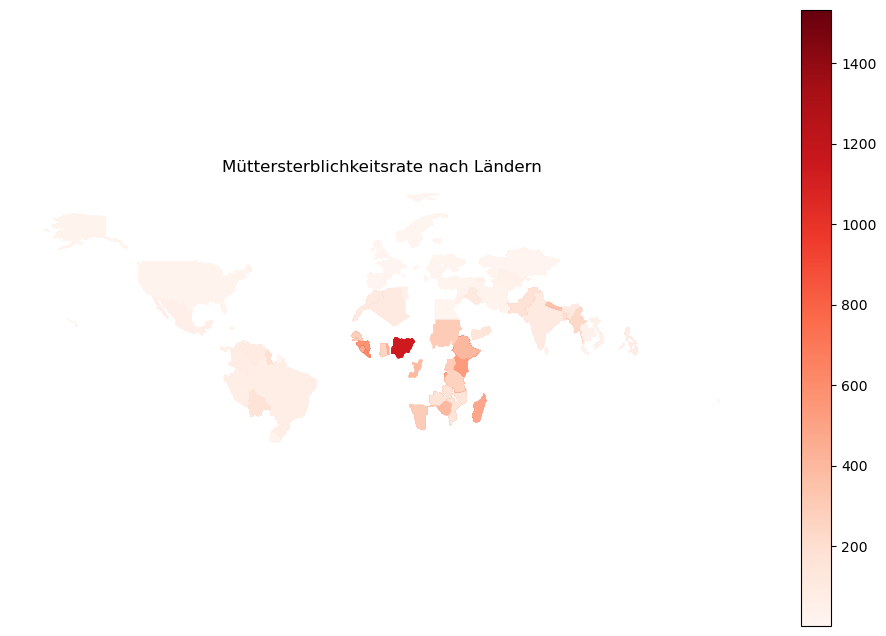

In [203]:
# Die Daten mithilfe der Spalte "Müttersterblichkeitsrate" plotten
ax = merged_geo.plot(
    column="Müttersterblichkeitsrate",  # Spalte für die Farbzuordnung
    legend=True,
    cmap="Reds",  # Farbkarte
    figsize=(12, 8)
)

# Einen Titel hinzufügen und das Layout anpassen
ax.set_title("Müttersterblichkeitsrate nach Ländern", fontsize=12)
ax.set_axis_off()  # Achsen entfernen
plt.show()

C:\Users\veron\AppData\Local\Temp\ipykernel_5656\2334821655.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  colorbar.set_yticklabels([format_func(tick, 0) for tick in colorbar.get_yticks()])


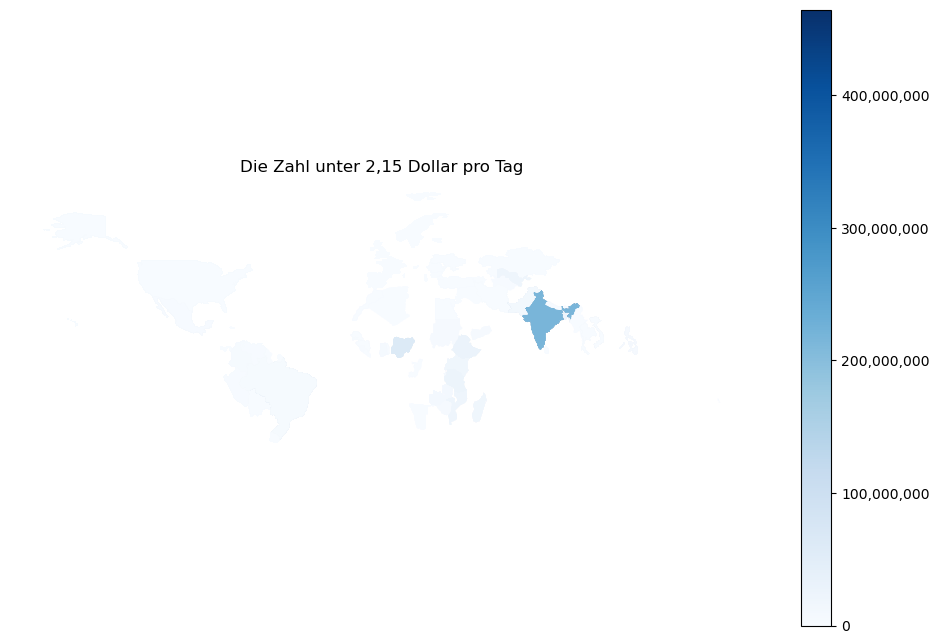

In [204]:
# Die Daten mithilfe der Spalte "Armut" darstellen
ax = merged_geo.plot(
    column="Die Zahl unter 2,15 Dollar pro Tag",  # Spalte für die Farbzuordnung
    legend=True,
    cmap="Blues",  # Farbkarte
    figsize=(12, 8)
)

# Einen Titel hinzufügen und das Layout anpassen
ax.set_title("Die Zahl unter 2,15 Dollar pro Tag", fontsize=12)
ax.set_axis_off()  # Achsen entfernen
# Die Farbskala aus dem Plot abrufen
colorbar = ax.get_figure().axes[1]  # Die zweite Achse ist die Farbskala

# Benutzerdefiniertes Tick-Format, um wissenschaftliche Notation zu vermeiden
def format_func(value, tick_number):
    return f"{int(value):,}"  # Als normale ganze Zahl mit Kommas formatieren

# Den Formatierer auf die Farbskala-Ticks anwenden
colorbar.set_yticklabels([format_func(tick, 0) for tick in colorbar.get_yticks()])


# Den Plot anzeigen
plt.show()

### 3.2 Analyse Jahr

In [205]:
print('Anzahl verschiedener Jahre: ', len(merged_df['Jahr'].unique()))

Anzahl verschiedener Jahre:  31


In [206]:
# Anzahl Datenpunkte pro Jahr
merged_df['Jahr'].value_counts().sort_index()

Jahr
1990    13
1991    11
1992    20
1993    13
1994    12
1995    18
1996    19
1997    16
1998    20
1999    19
2000    21
2001    18
2002    30
2003    27
2004    33
2005    35
2006    40
2007    30
2008    32
2009    35
2010    38
2011    38
2012    41
2013    31
2014    34
2015    40
2016    37
2017    34
2018    41
2019    35
2020    30
Name: count, dtype: int64

In [207]:
import seaborn as sns

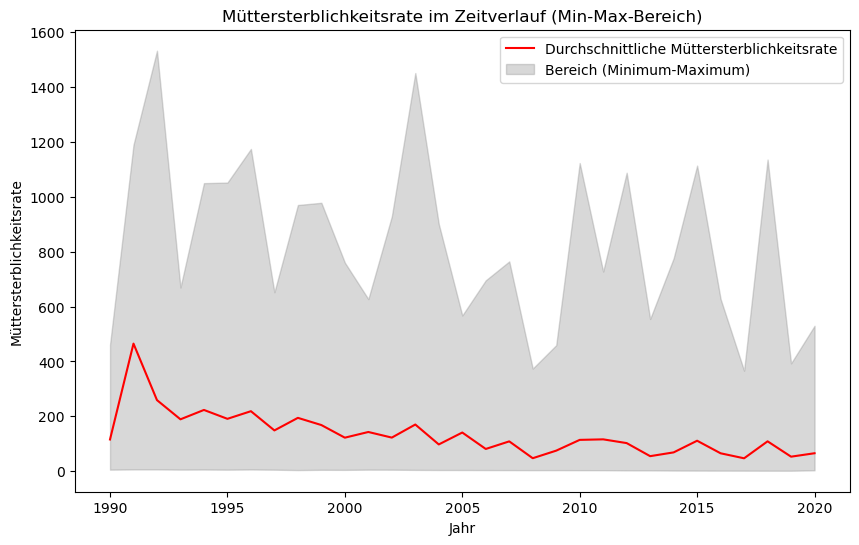

In [208]:
# Erstellen eines Bereichsdiagramms (wie ein Kerzendiagramm) für den Armutsanteil oder die Müttersterblichkeit.
plt.figure(figsize=(10, 6))

# Daten nach Jahr gruppieren und Statistiken berechnen (Minimum, Maximum und Mittelwert für jedes Jahr)
yearly_stats = merged_df.groupby('Jahr').agg(
    min_value=('Müttersterblichkeitsrate', 'min'),
    max_value=('Müttersterblichkeitsrate', 'max'),
    mean_value=('Müttersterblichkeitsrate', 'mean')
).reset_index()

# Erstellen des "Kerzen"-Diagramms – Bereichsdiagramm (unter Verwendung von Minimal- und Maximalwerten)
sns.lineplot(data=yearly_stats, x="Jahr", y="mean_value", label="Durchschnittliche Müttersterblichkeitsrate", color="red")
plt.fill_between(yearly_stats['Jahr'], yearly_stats['min_value'], yearly_stats['max_value'], color='gray', alpha=0.3, label="Bereich (Minimum-Maximum)")

# Hinzufügen von Beschriftungen und Titel
plt.xlabel("Jahr")
plt.ylabel("Müttersterblichkeitsrate")
plt.title("Müttersterblichkeitsrate im Zeitverlauf (Min-Max-Bereich)")
plt.legend()
plt.show()

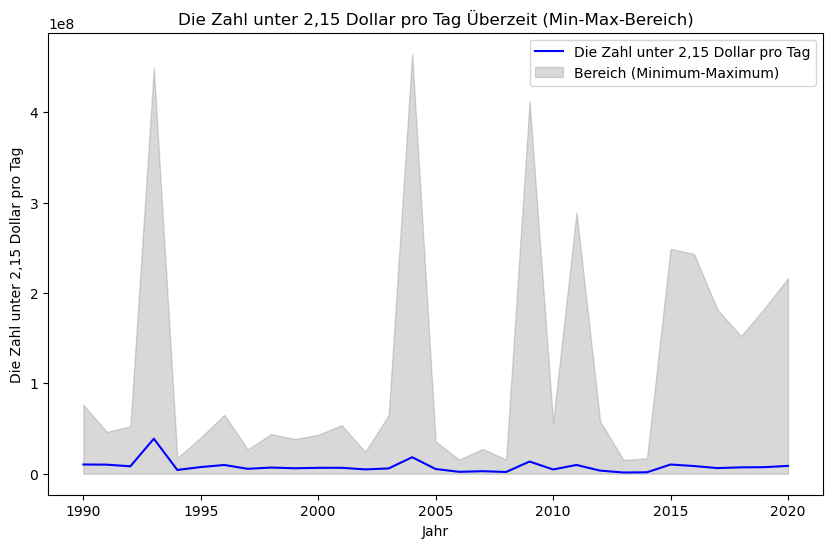

In [209]:
# Erstellen eines Bereichsdiagramms (wie ein Kerzendiagramm) für den Armutsanteil oder die Müttersterblichkeit
plt.figure(figsize=(10, 6))

# Daten nach Jahr gruppieren und Statistiken berechnen (Minimum, Maximum und Mittelwert für jedes Jahr)
yearly_stats = merged_df.groupby('Jahr').agg(
    min_value=('Die Zahl unter 2,15 Dollar pro Tag', 'min'),
    max_value=('Die Zahl unter 2,15 Dollar pro Tag', 'max'),
    mean_value=('Die Zahl unter 2,15 Dollar pro Tag', 'mean')
).reset_index()

# Erstellen des "Kerzen"-Diagramms – Bereichsdiagramm (unter Verwendung von Minimal- und Maximalwerten)
sns.lineplot(data=yearly_stats, x="Jahr", y="mean_value", label="Die Zahl unter 2,15 Dollar pro Tag", color="blue")
plt.fill_between(yearly_stats['Jahr'], yearly_stats['min_value'], yearly_stats['max_value'], color='gray', alpha=0.3, label="Bereich (Minimum-Maximum)")

# Hinzufügen von Beschriftungen und Titel
plt.xlabel("Jahr")
plt.ylabel("Die Zahl unter 2,15 Dollar pro Tag")
plt.title("Die Zahl unter 2,15 Dollar pro Tag Überzeit (Min-Max-Bereich)")
plt.legend()
plt.show()

## 4. Analyse 

### Vorgehen

### 4.1 Berechnung der Korrelation

In [210]:
correlation = merged_df["Die Zahl unter 2,15 Dollar pro Tag"].corr(merged_df["Müttersterblichkeitsrate"])
print(f"Korrelationskoeffizient: {correlation}")


Korrelationskoeffizient: 0.2104116158453981


### 4.2 Visualisierung der Korrelation zwischen Armut und Müttersterblichkeitsrate

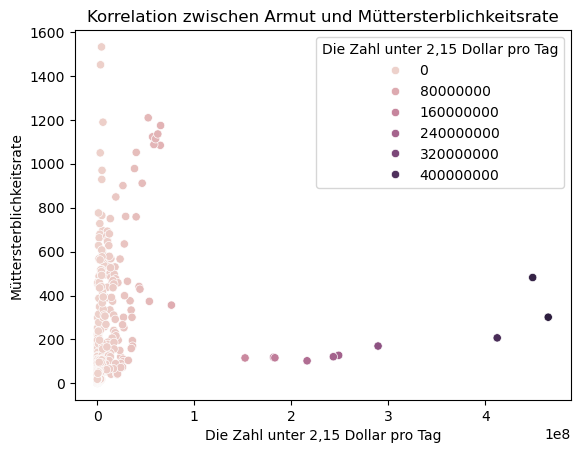

In [211]:
sns.scatterplot(
    data=merged_df,
    x="Die Zahl unter 2,15 Dollar pro Tag",
    y="Müttersterblichkeitsrate",
   hue="Die Zahl unter 2,15 Dollar pro Tag",  # Numerische Spalte für den Farbverlauf
)
plt.title("Korrelation zwischen Armut und Müttersterblichkeitsrate")
plt.xlabel("Die Zahl unter 2,15 Dollar pro Tag")
plt.ylabel("Müttersterblichkeitsrate")
plt.show()

### 4.3 Berechnung positiver und negativer Korrelationen

In [212]:
def calculate_correlations(df, group_col, col1, col2):
    correlations = (
        df.groupby(group_col)
        .apply(
            lambda x: x[[col1, col2]].corr().iloc[0, 1],
            include_groups=False  # Gruppierungsspalte ausschliessen
        )
        .dropna()  # NaN-Korrelationen entfernen
        .sort_values(ascending=False)  # Nach Stärke sortieren
    )
    return correlations

correlations = calculate_correlations(
    merged_df,
    group_col="Gebiet",
    col1="Müttersterblichkeitsrate",
    col2="Die Zahl unter 2,15 Dollar pro Tag"
)

# Stärkste Korrelationen anzeigen
print("Stärkste positive Korrelation:\n", correlations.head(5))
print("Stärkste negative Korrelation:\n", correlations.tail(5))

Stärkste positive Korrelation:
 Gebiet
Vanuatu    1.0
Myanmar    1.0
Guyana     1.0
Algeria    1.0
Sudan      1.0
dtype: float64
Stärkste negative Korrelation:
 Gebiet
Burundi      -0.871672
Zimbabwe     -0.901840
Zambia       -0.926929
Madagascar   -0.997377
Iraq         -1.000000
dtype: float64


### 4.4 Visualisierung positiver und negativer Korrelationen

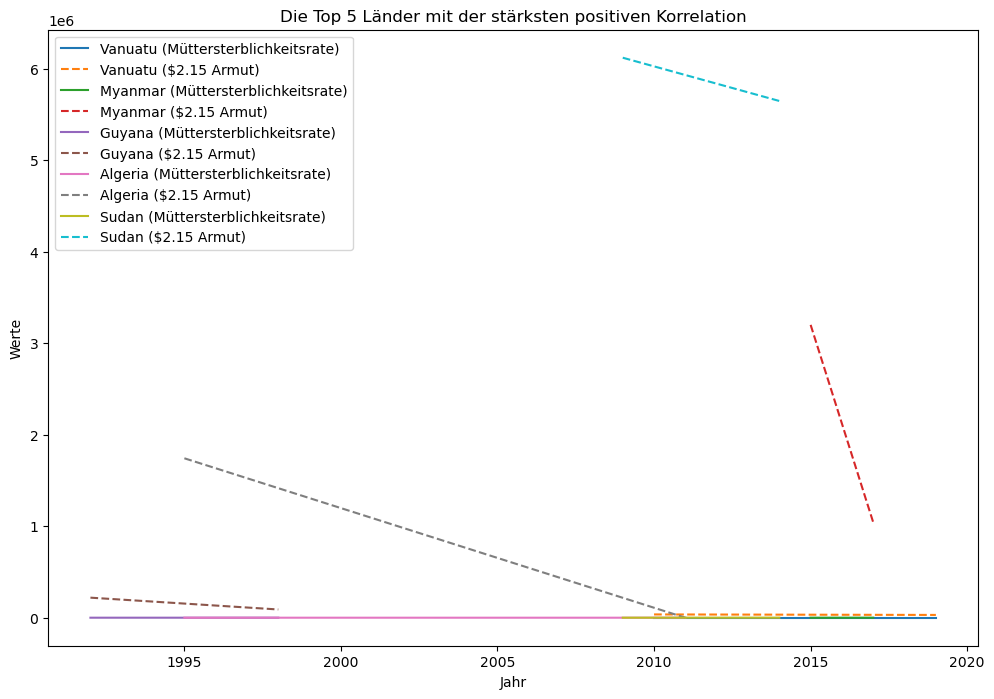

In [213]:
top_countries = correlations.head(5).index

plt.figure(figsize=(12, 8))
for country in top_countries:
    data = merged_df[merged_df['Gebiet'] == country]
    sns.lineplot(data=data, x='Jahr', y='Müttersterblichkeitsrate', label=f"{country} (Müttersterblichkeitsrate)")
    sns.lineplot(data=data, x='Jahr', y="Die Zahl unter 2,15 Dollar pro Tag", label=f"{country} ($2.15 Armut)", linestyle="--")

plt.title("Die Top 5 Länder mit der stärksten positiven Korrelation")
plt.xlabel("Jahr")
plt.ylabel("Werte")
plt.legend()
plt.show()

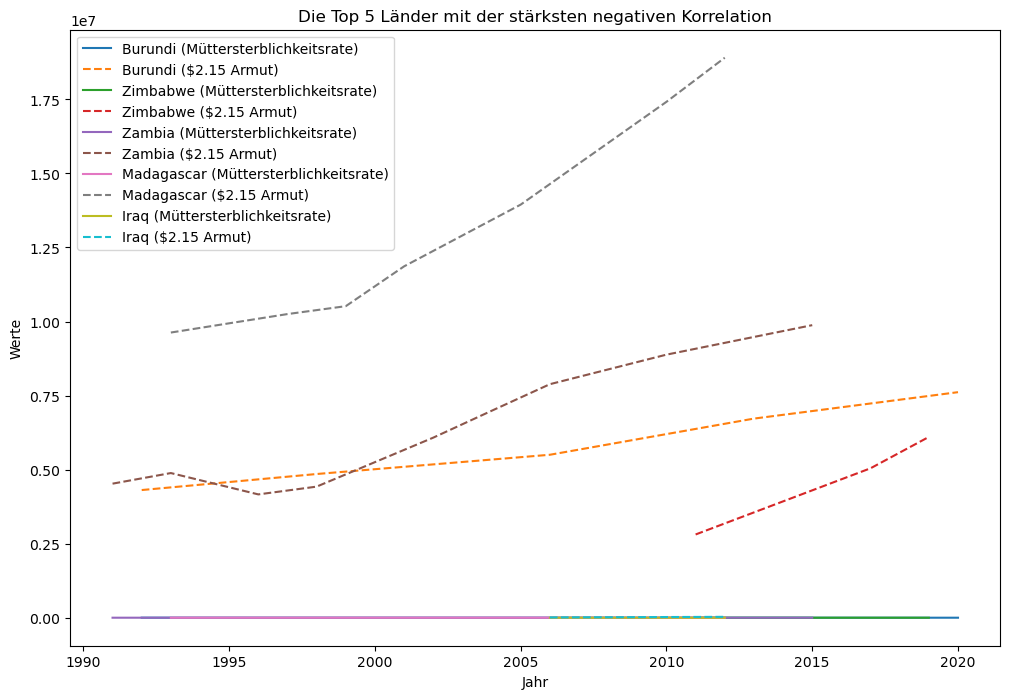

In [214]:
bottom_countries = correlations.tail(5).index

plt.figure(figsize=(12, 8))
for country in bottom_countries:
    data = merged_df[merged_df['Gebiet'] == country]
    sns.lineplot(data=data, x='Jahr', y='Müttersterblichkeitsrate', label=f"{country} (Müttersterblichkeitsrate)")
    sns.lineplot(data=data, x='Jahr', y='Die Zahl unter 2,15 Dollar pro Tag', label=f"{country} ($2.15 Armut)", linestyle="--")

plt.title("Die Top 5 Länder mit der stärksten negativen Korrelation")
plt.xlabel("Jahr")
plt.ylabel("Werte")
plt.legend()
plt.show()